In [8]:
import os
from dotenv import load_dotenv
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from examples.data.aml import dataframe

In [9]:
load_dotenv()

# Dapatkan API key dari variabel lingkungan
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# Inisialisasi OpenAI dengan API key yang dibaca
llm = OpenAI()

In [6]:
#contoh sumber data yang berasal dari file csv yang disimpan di examples/data/Loan payments data.csv
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
pandas_ai = PandasAI(llm, verbose=True)

In [8]:
pandas_ai.run(df, "Calculate the sum of the gdp of north american countries")

Running PandasAI with openai LLM...

Code generated:
```
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[df['Timestamp'].dt.year >= 2020]
na_countries = ['Canada', 'United States', 'Mexico']
na_gdp = df[df['Country'].isin(na_countries)]['GDP'].sum()
print(na_gdp)
```
Answer: 0
Conversational answer: I'm sorry, but I cannot provide a sum for the GDP of North American countries as you did not specify any countries to include in the calculation.


"I'm sorry, but I cannot provide a sum for the GDP of North American countries as you did not specify any countries to include in the calculation."

Running PandasAI with openai LLM...

Code generated:
```
asia_df = df[df['From Bank'].isin(['10', '12', '3208', '3209']) | df[
    'To Bank'].isin(['10', '12', '3208', '3209'])]
non_asia_df = df[~df['From Bank'].isin(['10', '12', '3208', '3209']) & ~df[
    'To Bank'].isin(['10', '12', '3208', '3209'])]
asia_percent = len(asia_df) / len(df) * 100
non_asia_percent = len(non_asia_df) / len(df) * 100
import matplotlib.pyplot as plt
labels = ['Asia', 'Non-Asia']
sizes = [asia_percent, non_asia_percent]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Transactions from Asia and Non-Asia')
plt.show()
```


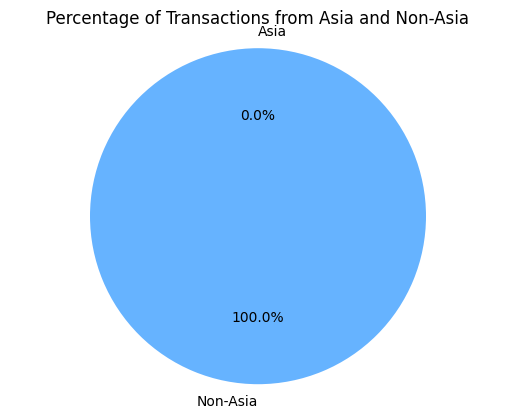

Answer: None
Conversational answer: Can you show me a diagram comparing the percentage of transactions from Asia and non-Asia?


'Can you show me a diagram comparing the percentage of transactions from Asia and non-Asia?'

In [13]:
pandas_ai.run(df, "bandingkan prosentase transaksi yang berasal dari asia dan non-asia dalam bentuk diagram")

In [14]:
pandas_ai.run(df, "bandingkan prosentase transaksi yang check dan kartu kredit dalam bentuk diagram")

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')
cheque = df[df['Payment Format'] == 'Cheque']
credit_card = df[df['Payment Format'] == 'Credit Card']
cheque_percent = len(cheque) / len(df) * 100
credit_card_percent = len(credit_card) / len(df) * 100
labels = ['Cheque', 'Credit Card']
sizes = [cheque_percent, credit_card_percent]
colors = ['yellowgreen', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Cheque and Credit Card Transactions')
plt.show()
```


SyntaxError: invalid syntax (<unknown>, line 1)

In [7]:
from neo4j import GraphDatabase
uri = 'bolt://localhost:7687'
username = 'neo4j'
password = 'password'
driver = GraphDatabase.driver(uri, auth=(username, password))

def create_nodes(tx, data):
    tx.run(
        'MERGE (a:Account {id: $from_account, bank: $from_bank}) MERGE (b:Account {id: $to_account, bank: $to_bank})'
        , from_account=data['Account'], from_bank=data['From Bank'],
        to_account=data['Account.1'], to_bank=data['To Bank'])
    tx.run(
        'MERGE (t:Transaction {id: $timestamp, amount_received: $amount_received, receiving_currency: $receiving_currency, amount_paid: $amount_paid, payment_currency: $payment_currency, payment_format: $payment_format, is_laundering: $is_laundering})'
        , timestamp=data['Timestamp'], amount_received=data[
            'Amount Received'], receiving_currency=data['Receiving Currency'],
        amount_paid=data['Amount Paid'], payment_currency=data[
            'Payment Currency'], payment_format=data['Payment Format'],
        is_laundering=data['Is Laundering'])
    tx.run(
        'MATCH (a:Account {id: $from_account}) MATCH (b:Account {id: $to_account}) MATCH (t:Transaction {id: $timestamp}) MERGE (a)-[:SENT]->(t) MERGE (t)-[:RECEIVED]->(b)'
        , from_account=data['Account'], to_account=data['Account.1'],
        timestamp=data['Timestamp'])


for index, row in df.iterrows():
    with driver.session() as session:
        session.execute_write(create_nodes, row)
driver.close()

def print_all_nodes_and_relationships(tx):
    result = tx.run("MATCH (n)-[r]->(m) RETURN n, r, m")
    for record in result:
        print(record["n"], record["r"], record["m"])

with driver.session() as session:
    session.read_transaction(print_all_nodes_and_relationships)

NameError: name 'df' is not defined